# K Nearest Neighbors Classifiers**

## Aim
To classify the Iris flower into 3 different species

## Dataset
Iris Dataset

## Source
Kaggle

In [ ]:
# Importing required packages
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading dataset
data=pd.read_csv("/content/drive/MyDrive/Iris.csv")

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Selecting required features
lst=["SepalLengthCm","SepalWidthCm"]
x=data.loc[:,lst]
y=data.loc[:,"Species"]

In [ ]:
# Splitting the dataset into train test split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

Accuarcy :  71.0


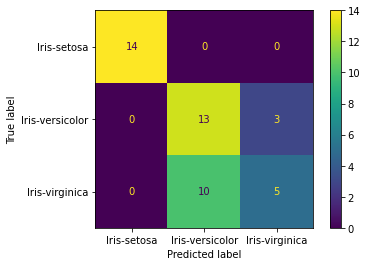

Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.57      0.81      0.67        16
 Iris-virginica       0.62      0.33      0.43        15

       accuracy                           0.71        45
      macro avg       0.73      0.72      0.70        45
   weighted avg       0.72      0.71      0.69        45



In [ ]:
# Fitting our model KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
knn.score(X_train,y_train)
print("Accuarcy : ",round(metrics.accuracy_score(y_test,y_pred),2)*100)
plot_confusion_matrix(knn,X_test,y_test)
plt.show()
print("Classification Report\n",classification_report(y_test,y_pred))

# Conclusion

### We have got an accuracy score of 71% which shows that our model classifies the species correctly


In our test set there are

14 setosa species

16 versicolor

15 virginica


For Iris Setosa

True Positive TP 14

False Positive FP 0

True Negative TN 31

False Negative FN 0

## Based on Classifiaction report
### Our model has 14 setosa species and based on precision and recall our model has correctly predicted all the 14 instances as setosa
### As f1 score is close to 1 we can conclude that our model can best predict the class setosa

## For Iris Versicolor
## True Positive TP 13
## False Positive FP 10
## True Negative TN 21
## False Negative FN 3

## Based on Classifiaction report
### Our model has 16 versicolor species and based on precision our model has predicted 57% as versicolor
### Based on recall our model has correctly predicted 81% as versicolor
### As f1 score is close to 1 we can conclude that our model can  predict the class versicolor

## For Iris Virginica
## True Positive TP 5
## False Positive FP 3
## True Negative TN 27
## False Negative FN 10

## Based on Classifiaction report
### Our model has 15 virginica species and based on precision our model has predicted 62% as virginica
### Based on recall our model has correctly predicted 33% as verginica
### As f1 score is not close to 1 we can conclude that our model cannot  predict the class virginica correctly

### We see that compared to versicolor and virginica our model better predicts setosa class

In [ ]:
# Grid Search CV for hyperparameter tuning
para={'n_neighbors':np.arange(5,20),
      'weights':['uniform','distance'],
      'p':[1,2]}
grd=GridSearchCV(KNeighborsClassifier(),para)
grd.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [ ]:
grd.best_params_

{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

In [ ]:
# Using GridSearchCV we have got neighbors as 5 the distance measure as manhattan and weights
# as uniform

Accuarcy after grid search CV is :  76.0


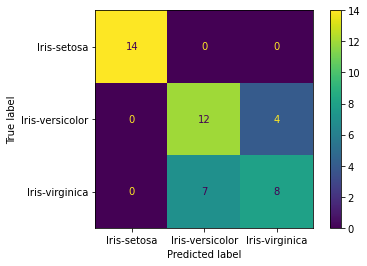

Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.63      0.75      0.69        16
 Iris-virginica       0.67      0.53      0.59        15

       accuracy                           0.76        45
      macro avg       0.77      0.76      0.76        45
   weighted avg       0.76      0.76      0.75        45



In [ ]:
# Fitting our model to the best parameter obtained from grid search cv
knn1=KNeighborsClassifier(n_neighbors=5,weights='uniform',p=2)
knn1.fit(X_train,y_train)
y1_pred=knn1.predict(X_test)
knn1.score(X_train,y_train)
print("Accuarcy after grid search CV is : ",round(metrics.accuracy_score(y_test,y1_pred),2)*100)
plot_confusion_matrix(knn1,X_test,y_test)
plt.show()
print("Classification Report\n",classification_report(y_test,y1_pred))

# Conclusion
## We have got an accuracy score of 76% which shows that our model classifies the species correctly

In our test set there are

14 setosa species

16 versicolor

15 virginica



For Iris Setosa

True Positive TP 14

False Positive FP 0

True Negative TN 31

False Negative FN 0

## Based on Classifiaction report
### Our model has 14 setosa species and based on precision and recall our model has correctly predicted all the 14 instances as setosa
### As f1 score is close to 1 we can conclude that our model can best predict the class setosa

# For Iris Versicolor
# True Positive TP 12
# False Positive FP 7
# True Negative TN  22
# False Negative FN 4

## Based on Classifiaction report
### Our model has 16 versicolor species and based on precision our model has predicted 63% as versicolor
### Based on recall our model has correctly predicted 75% as versicolor
### As f1 score is close to 1 we can conclude that our model can  predict the class versicolor

For Iris Virginica
True Positive TP 8
False Positive FP 4
True Negative TN  26
False Negative FN 7

## Based on Classifiaction report
### Our model has 15 virginica species and based on precision our model has predicted 67% as virginica
### Based on recall our model has correctly predicted 53% as verginica
### As f1 score is not that close to 1 we can conclude that our model cannot predict the class virginica accurately

In [ ]:
# Conclusion

# After using grid search cv and finding the optimal neighbors as 5 we get a
# better model
# that can predict the classes accurately compared to that of original model with
# 8 neighbors.